# Here is what you need to know about staying in Boston

Questions:
* What high-rent times of the year should you avoid
* Which neighborhoods have the cleanest flats
* 



In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

%matplotlib inline


In [30]:
calendar2017 = pd.read_csv('calendar2017.csv', delimiter=',')
calendar2018 = pd.read_csv('calendar2018.csv', delimiter=',')
calendar2019 = pd.read_csv('calendar2019.csv', delimiter=',')

calendar052018 = pd.read_csv('calendar_up0518_rg04180419.csv', delimiter=',')
calendar042018 = pd.read_csv('calendar_up0418_rg04180519.csv', delimiter=',')
listings = pd.read_csv('listings.csv', delimiter=',')
reviews = pd.read_csv('reviews.csv', delimiter=',')


In [4]:
print(calendar2017.shape)
print(listings.shape)
print(reviews.shape)


(1308890, 4)
(3585, 95)
(68275, 6)


In [7]:
# check out the missing values from 
print(np.sum(calendar2017.isnull()))

print('Portion of missing values in price column: {}'.format(calendar2017["price"].isnull().sum()/calendar2017.shape[0]))


listing_id         0
date               0
available          0
price         665853
dtype: int64
Portion of missing values in price column: 0.5087157820748879


In [8]:
calendar2017.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
# clean the price column to allow for arithmetic operations
conv_str = lambda x: str(x)[1:].replace(',', '') if '$' in str(x) else x

calendar2017['price'] = calendar2017['price'].apply(conv_str)
calendar2017['price'] = calendar2017['price'].apply(lambda x: float(x))
calendar2017.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [11]:
# get the descriptive statistics of average price per listing
grouped_price = calendar2017.groupby('listing_id')['price'].mean()

grouped_price.describe()


count    2906.000000
mean      196.935127
std       157.729807
min        11.000000
25%        90.000000
50%       160.000000
75%       264.717664
max      4000.000000
Name: price, dtype: float64

C:\Users\julia\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\julia\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


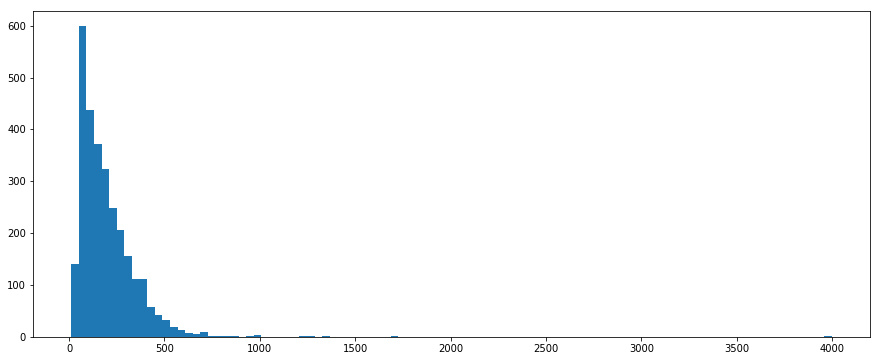

In [12]:
# plot the average prices across all listing ids
plt.figure(figsize=(15,6))
plt.hist(grouped_price, bins=100);


In [13]:
# average price throughout time
grouped_date = calendar2017.groupby('date')['price'].mean()

grouped_date.describe()


count    365.000000
mean     201.165200
std       20.989130
min      177.023002
25%      186.764936
50%      196.100469
75%      205.207474
max      286.921977
Name: price, dtype: float64

In [14]:
grouped_date

date
2016-09-06    241.043860
2016-09-07    251.833691
2016-09-08    251.748749
2016-09-09    261.859327
2016-09-10    266.847280
2016-09-11    249.565041
2016-09-12    245.732597
2016-09-13    250.206977
2016-09-14    256.647799
2016-09-15    269.092903
2016-09-16    286.921977
2016-09-17    286.185554
2016-09-18    261.592955
2016-09-19    246.632945
2016-09-20    241.203993
2016-09-21    244.225750
2016-09-22    249.625355
2016-09-23    250.712274
2016-09-24    259.378705
2016-09-25    256.321691
2016-09-26    244.979556
2016-09-27    245.324846
2016-09-28    234.278376
2016-09-29    243.275229
2016-09-30    246.097490
2016-10-01    245.459259
2016-10-02    236.312305
2016-10-03    230.048227
2016-10-04    228.680249
2016-10-05    229.066098
                 ...    
2017-08-07    200.423529
2017-08-08    200.494684
2017-08-09    201.649692
2017-08-10    201.793509
2017-08-11    208.539665
2017-08-12    204.606484
2017-08-13    199.385818
2017-08-14    196.306145
2017-08-15    197.55

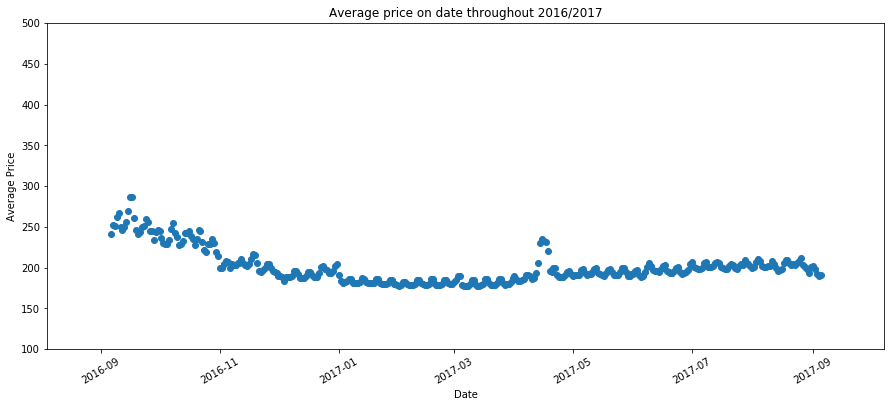

In [40]:
# plot the average prices across all dates
index_date = [np.datetime64(x) for x in grouped_date.index]

fig, ax = plt.subplots(figsize=(15,6))

plt.scatter(index_date, grouped_date.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
ax.set_ylim([100,500])
plt.title('Average price on date throughout 2016/2017')
plt.xticks(rotation=30);


In [58]:
# cleaning function for the calendar file
def clean(df):
    '''
    cleaning the price data for the calendar files
    INPUT: dataframe
    OUTPUT: Series with average price throughout time; Series with dates in np.datetime64 format
    '''
    # cleaning price column
    conv_str = lambda x: str(x)[1:].replace(',', '') if '$' in str(x) else x
    df['price'] = df['price'].apply(conv_str)
    df['price'] = df['price'].apply(lambda x: float(x))
    
    # average price throughout time
    grouped_date = df.groupby('date')['price'].mean()
    
    # remove year from date column to allow to lay each calendar dataframe price column on top of each other
    index_date = [x[5:] for x in grouped_date.index]

    return index_date, grouped_date


In [72]:
# plotting the price data of relevant calendar dataframes
def plot_cal(x_lst, y_lst, year_lst, color_lst):
    '''
    INPUT: index_date is x_lst, grouped_date is y_lst
    OUTPUT: scatterplot of all average prices of calendar dataframes over time
    '''
    # plot data
    fig, ax = plt.subplots(figsize=(15,6))
    
    for i in range(len(x_lst)):
        ax.scatter(x_lst[i], y_lst[i].values, c=color_lst[i], label=year_lst[i])
    
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    ax.set_ylim([100,500])
    monthyearFmt = mdates.DateFormatter('%B')
    ax.xaxis.set_major_formatter(monthyearFmt)
    plt.legend(loc='upper left')
    plt.title('Average price on dates')
    plt.xticks(rotation=30);


In [59]:
# clean all calendar price columns
X2017, y2017 = clean(calendar2017)
X2018, y2018 = clean(calendar2018)
X2019, y2019 = clean(calendar2019)


In [67]:

X2017 = [datetime.strptime(x, '%m-%d') for x in X2017]
X2018 = [datetime.strptime(x, '%m-%d') for x in X2018]
X2019 = [datetime.strptime(x, '%m-%d') for x in X2019]

In [68]:
# creating input lists for plot function
x_lst = [X2017, X2018, X2019]
y_lst = [y2017, y2018, y2019]
year_lst = ['2017', '2018', '2019']
color_lst = ['b', 'r', 'g']


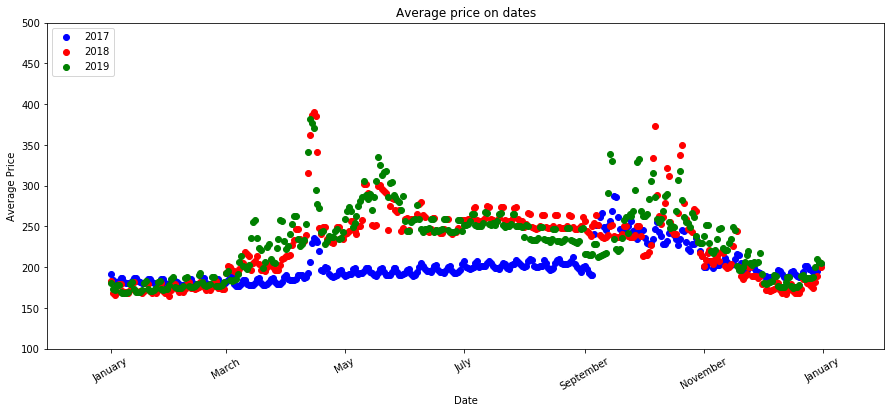

In [73]:
# plotting all three calendars' average prices
plot_cal(x_lst, y_lst, year_lst, color_lst)


In [16]:
# check whether any listings dropped out during the course of the year
grouped_ids = calendar2017.groupby('date')['listing_id'].count()

grouped_ids.describe()


count     365.0
mean     3586.0
std         0.0
min      3586.0
25%      3586.0
50%      3586.0
75%      3586.0
max      3586.0
Name: listing_id, dtype: float64

Looking at the plot, it seems that mid-May is especially expensive as well as 